<a href="https://colab.research.google.com/github/idelvalle/03MAIR-Algoritmos-de-optimizacion/blob/master/AG3/AG3_Ignacio_del_Valle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ignacio del Valle Torres-AG3 <br>
Actividad Guiada 3<br>
Url: https://github.com/idelvalle/03MAIR-Algoritmos-de-optimizacion/tree/master/AG3

In [0]:
import urllib.request
import tsplib95
import random
from math import e

file = "swiss42.tsp"

urllib.request.urlretrieve("http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/swiss42.tsp", file)


problem = tsplib95.load_problem(file)


#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges())

In [0]:
#Devuelve el factorial de un numero
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

In [23]:
# Generamos solución aleatoria que empieza en el nodo 0
def crear_solucion(Nodos):
  solucion = [0]
  for i in range(len(Nodos)-1):
    solucion = solucion + [random.choice(list(set(Nodos) - set({0}) - set(solucion)))]
  return solucion 

#crear_solucion(Nodos)

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.wfunc(a,b)

print(distancia(0,1,problem))

#Devuelve la distancia total de una trayectoria
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)


solucion = crear_solucion(Nodos)

distancia_total(solucion,problem)

15


5322

In [24]:
#BUSQUEDA ALEATORIA

def busqueda_aleatoria(problem,N):
  
  Nodos = list(problem.get_nodes())
  
  mejor_solucion = []
  mejor_distancia = 10e100
  
  for i in range(N):
    solucion = crear_solucion(Nodos)
    distancia = distancia_total(solucion,problem)
    
    if distancia < mejor_distancia:
        mejor_solucion = solucion
        mejor_distancia = distancia
   
  
  print("Mejor solución:", mejor_solucion)
  print("Distancia:", mejor_distancia)

  return mejor_solucion

sol = busqueda_aleatoria(problem, 50000)


Mejor solución: [0, 18, 11, 1, 36, 20, 35, 31, 26, 21, 29, 32, 33, 34, 38, 30, 16, 6, 17, 39, 24, 13, 2, 22, 27, 7, 10, 8, 40, 23, 9, 41, 25, 14, 37, 28, 15, 3, 4, 19, 5, 12]
Distancia: 3626


In [25]:
#BUSQUEDA LOCAL, GENERADOR DE VECINDAD

def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #print(solucion)
  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1,len(solucion)-1):
    for j in range(i+1, len(solucion)):
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
      distancia_vecina = distancia_total(vecina, problem)
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion

solucion = crear_solucion(Nodos)
print(solucion)

nueva_solucion = genera_vecina(solucion)
print(nueva_solucion)

[0, 37, 39, 10, 4, 19, 7, 20, 27, 15, 38, 24, 8, 1, 26, 12, 32, 28, 30, 6, 25, 21, 35, 36, 31, 14, 16, 34, 2, 9, 3, 40, 17, 11, 5, 41, 18, 29, 22, 13, 23, 33]
[0, 37, 39, 10, 4, 19, 7, 20, 27, 15, 38, 24, 8, 1, 26, 12, 32, 28, 30, 6, 25, 21, 35, 36, 31, 14, 16, 34, 2, 9, 3, 13, 17, 11, 5, 41, 18, 29, 22, 40, 23, 33]


In [26]:
#BUSQUEDA LOCAL

def busqueda_local(problem, N):
  mejor_solucion = []
  mejor_distancia = 10e100
  
  Nodos = list(problem.get_nodes())
  
  solucion_referencia = crear_solucion(Nodos)
  
  for i in range(N):
    vecina = genera_vecina(solucion_referencia)
    distancia_vecina = distancia_total(vecina,problem)
    
    if distancia_vecina < mejor_distancia:
      mejor_solucion = vecina
      mejor_distancia = distancia_vecina
      
    solucion_referencia = vecina
  
  print("Mejor solución:", mejor_solucion)
  print("Distancia:", mejor_distancia)

  return mejor_solucion
  
  
sol = busqueda_local(problem,100)

Mejor solución: [0, 29, 9, 39, 21, 40, 24, 22, 38, 30, 28, 32, 34, 33, 20, 35, 36, 37, 15, 16, 14, 8, 23, 41, 10, 25, 11, 12, 18, 13, 19, 5, 26, 7, 17, 31, 1, 6, 4, 3, 2, 27]
Distancia: 1630


In [0]:
# RECOCIDO SIMULADO

def genera_vecina_aleatorio(solucion):
  #Generador de 1 solucion vecina 2-opt (intercambiar 2 nodos)
  #Se puede mejorar haciendo que la elección no se uniforme sino entre las que estén más proximas
  i = random.choice(range(1, len(solucion)) )
  j = random.choice(list(set(range(1, len(solucion))) - {i}))
  vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
  return vecina

def probabilidad(T,d):
  r=random.random();
  if(r <= (e**(-1*d)/(T*1.0))):
    return True
  else:
    return False
  
def bajar_temperatura(T):
  return T-1

In [28]:
# RECOCIDO SIMULADO

def recocido_simulado(problem, TEMPERATURA):
  #problem = datos del problema
  #T = Temperatura
  
  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)
  
  mejor_solucion = []
  mejor_distancia = 10e100
  
  while TEMPERATURA > 0:
    #Genera una solución vecina(aleatoria)
    vecina = genera_vecina_aleatorio(solucion_referencia)
    
    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)
    
    #Si es la mejor solución de todas se guarda
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina
    
    #Si la nueva vecina es mejor se cambia y si es peor se cambia según una probabilidad dependiente de T y de |distancia_referencia - distancia_vecina|
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    TEMPERATURA = bajar_temperatura(TEMPERATURA)
  
  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol = recocido_simulado(problem, 10000)

La mejor solución encontrada es [0, 3, 1, 5, 13, 19, 7, 31, 35, 36, 16, 14, 15, 37, 17, 20, 32, 30, 38, 22, 9, 23, 8, 28, 27, 2, 4, 6, 26, 25, 41, 40, 24, 21, 39, 33, 34, 29, 10, 11, 12, 18]
con una distancia total de 1910


In [29]:
# COLONIA DE HORMIGAS

def Add_Nodo(problem, H ,T ) :
  #Establecer una una funcion de probabilidad para 
  # añadir un nuevo nodo dependiendo de los nodos mas cercanos y de las feromonas depositadas
  Nodos = list(problem.get_nodes())
  return random.choice(   list(set(range(1,len(Nodos))) - set(H) )  )


def Incrementa_Feromona(problem, T, H):
  #Incrementar segun la calidad de la solución. Añadir una cantidad inversamente proporcional a la distancia total 
  for i in range(len(H)-1):
    T[H[i]][H[i+1]] += 1000/distancia_total(H, problem)
  return T

def Evaporar_Feromonas(T):
  #Podemos elegir diferentes funciones de evaporación dependiendo de la cantidad actual y de la suma total de feromonas depositadas,...
  #Evapora 0.3 el valor de la feromona, sin que baje de 1
  T = [[ max(T[i][j] - 0.3 , 1) for i in range(len(Nodos)) ] for j in range(len(Nodos))]
  return T

def hormigas(problem, N):
  #problem = datos del problema
  #N = Número de agentes(hormigas)
    
  #Nodos
  Nodos = list(problem.get_nodes())
    #Aristas
  Aristas = list(problem.get_edges()) 
  
  #Inicializa las aristas con una cantidad inicial de feromonas:1
  T = [[ 1 for _ in range(len(Nodos)) ] for _ in range(len(Nodos))]
  
  #Se generan los agentes(hormigas) que serán estructuras de caminos desde 0
  Hormiga = [[0] for _ in range(N)]
  
  #Recorre cada agente construyendo la solución
  for h in range(N):
    #print("\nAgente:", h)
    #Para cada agente se construye un camino
    for i in range(len(Nodos)-1):
      
      #Elige el siguiente nodo
      Nuevo_Nodo = Add_Nodo(problem, Hormiga[h] ,T )
      
      Hormiga[h].append(Nuevo_Nodo)     
    
    #Incrementa feromonas en esa arista 
    T = Incrementa_Feromona(problem, T, Hormiga[h] )
    #print("Feromonas(1)", T)
      
    #Evapora Feromonas  
    T = Evaporar_Feromonas(T)
    #print("Feromonas(2)", T)

    #Seleccionamos el mejor agente
  mejor_solucion = []
  mejor_distancia = 10e100
  for h in range(N):
    distancia_actual = distancia_total(Hormiga[h], problem)
    if distancia_actual < mejor_distancia:
      mejor_solucion = Hormiga[h]
      mejor_distancia =distancia_actual
  
  
  print(mejor_solucion)
  print(mejor_distancia)
  
  
hormigas(problem, 1000)

[0, 41, 30, 14, 36, 34, 2, 11, 29, 17, 15, 37, 19, 7, 4, 20, 33, 10, 12, 22, 9, 5, 18, 26, 27, 40, 25, 6, 13, 31, 35, 28, 24, 39, 21, 16, 3, 38, 23, 8, 1, 32]
3879


[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), (29, 30), (30, 31), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 42)]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


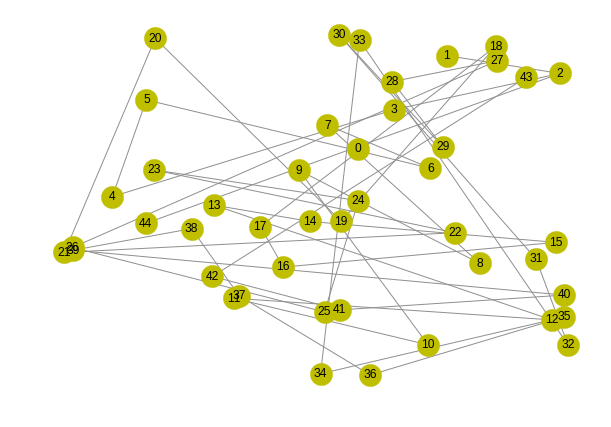

In [30]:
#HERRAMIENTA PARA DIBUJAR GRAFOS

problem = tsplib95.load_problem(file)

import networkx as nx
import matplotlib.pyplot as plt

def dibujar_grafo(Nodos, Aristas):
  G = nx.Graph()
  G.clear()

  #Dibuja los nodos
  G.add_nodes_from(Nodos)
  print(Nodos)


  #Dibuja aristas
  aristas = Aristas +  [(70 ,1 )]
  #print(aristas)
  G.add_edges_from(aristas)


  #nx.draw_networkx_labels(G,pos,labels,font_size=16)

  labels = {}
  for idx, node in enumerate(G.nodes()):
      labels[node] =  idx 

  nx.draw_random(G,node_color='y',edge_color='#909090',node_size=500, labels = labels )


Nodos = list(map( lambda x:problem.get_display(x) ,problem.get_nodes()))
Aristas = list(map(lambda x: (x,x+1), problem.get_nodes()))

print(Aristas)


dibujar_grafo(Nodos, Aristas)


## ALGORITMO GENÉTICO

In [31]:
#Genera una poblacion inicial de N individuos(soluciones)
def generar_poblacion(Nodos,N):
  return list(map(lambda x : crear_solucion(Nodos) , range(N) ))



#Evalua la población y devuelve el mejor individuo
def Evaluar_Poblacion(poblacion, problem):
  mejor_solucion = []
  mejor_distancia = 10e100
  for p in poblacion:
    #print("solucion:", p)
    distancia_referencia = distancia_total(p, problem)
    if distancia_referencia < mejor_distancia:
      mejor_solucion = p
      mejor_distancia = distancia_referencia
  return mejor_solucion, mejor_distancia



#Funcion que realiza la selección de la población
def Seleccionar(problem,poblacion,N,elitismo) :
    #Selecciona los N mejores; elitismo 100%. Mejora para incluir individuos menos adaptados para mejorar la diversidad
    return list(map(lambda y: y["solucion"] , 
                    sorted(list(map(lambda x : {"distancia": distancia_total(x, problem), "solucion":x}  ,poblacion)), key=lambda k: k['distancia'], reverse=False)))[:50]

  
  
#Funcion que realiza el cruce de la población
def Cruzar(poblacion, mutacion) :
  padres_elegidos = []
  nueva_poblacion=[]
  while(len(poblacion) - len(padres_elegidos) >=2 ) : 
    #Cruce con n punto de corte, desde 1 hasta el tamaño de los individuos
    corte = random.choice( range(1,len(poblacion[0])))
    
    #Eleccion de los padres
    padre_1 = random.choice(  list(set(range(len(poblacion))) - set(padres_elegidos)) )
    padres_elegidos.append(padre_1)
    padre_2 = random.choice(  list(set(range(len(poblacion))) - set(padres_elegidos)) )
    padres_elegidos.append(padre_2)
   
    hijo_1 = poblacion[padre_1][:corte] + poblacion[padre_2][corte:]
    hijo_2 = poblacion[padre_2][:corte] + poblacion[padre_1][corte:]


    #Recorre el cromosoma para detectar nodos repetidos. En caso de repetido elige un nodo que no este en el cromosoma 
    for i in range(corte, len(hijo_1) ) : 
      if hijo_1[i] in hijo_1[:i] : 
        hijo_1[i] = list(set(range(1,len(hijo_1))) - set(hijo_1) )[0]
        
      if hijo_2[i] in hijo_2[:i] : 
        hijo_2[i] = list(set(range(1,len(hijo_2))) - set(hijo_2) )[0]

    #Añade los hijos a la pobalción con posible mutacion
    nueva_poblacion.append(Mutar(hijo_1,mutacion))
    nueva_poblacion.append(Mutar(hijo_2,mutacion))
 
  #Devuelve la nueva poblacion
  return poblacion + nueva_poblacion

#Funcion para mutar un individuo
def Mutar(individuo, mutacion) : 
  if mutacion > random.uniform(0,1) : 
    #print("Hay mutacion")
    i = random.choice(range(1, len(individuo)) )
    j = random.choice(list(set(range(1, len(individuo))) - {i}))
    individuo[i],individuo[j] = individuo[j],individuo[i]
  return individuo

#Funcion principal del algoritmo genetico
#######################################################3
def algoritmo_genetico(problem=problem,N=100,mutacion=.15,elitismo=.1,generaciones=100):
  # problem = datos del problema
  # N = Tamaño de la población
  # mutacion = probabilidad de una mutación
  # elitismo = porcion de la mejor poblacion a mantener
  # generaciones = nº de generaciones a generar para finalizar

  #Genera la poblacion inicial
  Nodos = list(problem.get_nodes())
  poblacion = generar_poblacion(Nodos,N)
  
  #Inicializamos valores para la mejor solucion
  (mejor_solucion, mejor_distancia) = Evaluar_Poblacion(poblacion, problem)
  
  #Condicion de parada
  parar = False
  n=0
  #Inciamos el cliclo de generaciones
  while(parar == False) :
    
    #Cruce de la poblacion(incluye mutación)
    poblacion = Cruzar(poblacion,mutacion)
  
    #Seleccionamos la población
    poblacion = Seleccionar(problem,poblacion, N, elitismo)
      
    #Evaluamos la nueva población
    (mejor_solucion, mejor_distancia) = Evaluar_Poblacion(poblacion, problem)
  
    print("Generacion #", n, "\nLa mejor solución es:" , mejor_solucion, "\ncon distancia " , mejor_distancia, "\n")
 
    #Numero de generaciones. Criterio de parada
    if n==generaciones:
      parar = True
    n +=1
    
  return mejor_solucion
  
sol = algoritmo_genetico(problem=problem,N=1000,mutacion=.15,elitismo=.1,generaciones=200)

Generacion # 0 
La mejor solución es: [0, 30, 36, 12, 8, 41, 17, 35, 31, 34, 20, 25, 10, 3, 14, 38, 37, 6, 1, 33, 2, 4, 32, 5, 19, 13, 26, 15, 7, 27, 22, 39, 40, 9, 18, 21, 24, 11, 28, 16, 29, 23] 
con distancia  3828 

Generacion # 1 
La mejor solución es: [0, 32, 18, 26, 38, 41, 17, 35, 31, 34, 20, 25, 10, 3, 14, 8, 37, 13, 1, 33, 2, 4, 12, 5, 19, 6, 36, 15, 7, 27, 22, 39, 40, 9, 30, 21, 24, 11, 28, 16, 29, 23] 
con distancia  3774 

Generacion # 2 
La mejor solución es: [0, 34, 33, 27, 41, 8, 22, 24, 28, 31, 36, 35, 17, 6, 2, 7, 32, 25, 30, 11, 20, 19, 13, 1, 4, 5, 37, 38, 39, 40, 10, 14, 9, 15, 16, 18, 26, 21, 12, 23, 29, 3] 
con distancia  3741 

Generacion # 3 
La mejor solución es: [0, 10, 11, 1, 12, 28, 38, 15, 27, 29, 41, 30, 4, 17, 36, 37, 13, 3, 34, 35, 5, 6, 7, 8, 39, 40, 18, 20, 33, 32, 24, 21, 23, 25, 16, 19, 26, 14, 2, 9, 22, 31] 
con distancia  3716 

Generacion # 4 
La mejor solución es: [0, 10, 11, 1, 12, 28, 38, 15, 27, 29, 41, 30, 4, 17, 36, 37, 13, 3, 34, 35, 5, 6,